<a href="https://colab.research.google.com/github/hoangtuan0319-ship-it/Py-StaGroup/blob/main/B%C3%A0i%20cu%E1%BB%91i%20k%E1%BB%B3/Ch%C6%B0%C6%A1ng%203.%20Ti%E1%BB%81n%20x%E1%BB%AD%20l%C3%BD%20d%E1%BB%AF%20li%E1%BB%87u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHƯƠNG 3: TIỀN XỬ LÝ DỮ LIỆU**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()  #Chọn data Sleep_health_and_lifestyle_dataset.csv

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


## 3.1. Dữ liệu ban đầu

In [3]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
#Thông tin tổng quát về kiểu dữ liệu và giá trị null
print("\nThông tin chung của các biến:")
print(df.info())


Thông tin chung của các biến:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 

In [4]:
# Xem 5 dòng đầu tiên
print("\n5 dòng đầu tiên:")
display(df.head())


5 dòng đầu tiên:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
#Kiểm tra giá trị thiếu ở mỗi cột
print("\nSố lượng giá trị thiếu theo từng biến:")
print(df.isnull().sum())


Số lượng giá trị thiếu theo từng biến:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [7]:
#Kiểm tra dòng trùng lặp
print("\nSố lượng dòng trùng lặp:", df.duplicated().sum())


Số lượng dòng trùng lặp: 0


## 3.2. Làm sạch dữ liệu

In [8]:
# Xử lý giá trị thiếu bằng cách thay thế thành "No Disorder"
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [9]:
# --- Tách biến huyết áp ---
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic_BP'] = df['Systolic_BP'].astype(float)
df['Diastolic_BP'] = df['Diastolic_BP'].astype(float)
df.drop('Blood Pressure', axis=1, inplace=True)

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [11]:
#Phát hiện và loại bỏ ngoại lệ (IQR)
num_cols = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
            'Stress Level', 'Heart Rate', 'Daily Steps',
            'Systolic_BP', 'Diastolic_BP']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

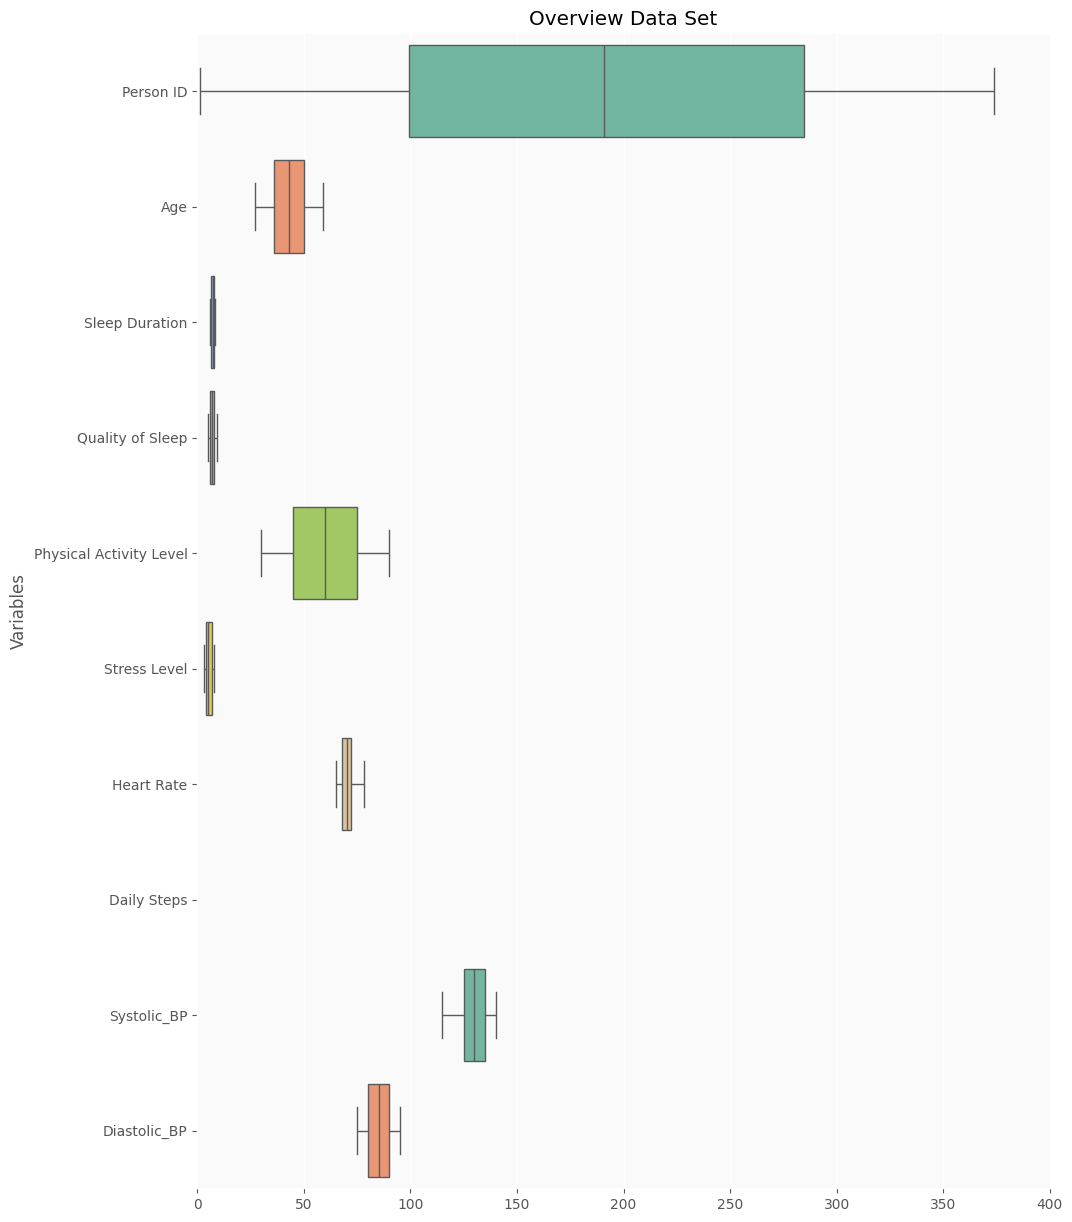

In [12]:
#Boxplot dữ liệu sau xử lý ngoại lai
plt.style.use('ggplot')

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 400))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df,
  orient = 'h',
  palette = 'Set2')

In [13]:
# Xem lại dữ liệu sau khi lọc
print("\n5 dòng đầu tiên:")
display(df.head())
print("Kích thước dữ liệu sau khi loại bỏ ngoại lệ:", df.shape)


5 dòng đầu tiên:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
7,8,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,No Disorder,120.0,80.0
8,9,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,No Disorder,120.0,80.0


Kích thước dữ liệu sau khi loại bỏ ngoại lệ: (359, 14)


In [14]:
##xuất file để thống kê mô tả
df.to_csv("Sleep_health_and_lifestyle_clean.csv", index=False)

## 3.3. Chuẩn hóa và mã hóa dữ liệu

In [15]:
#Chuẩn hóa dữ liệu định lượng
scaler = StandardScaler()
num_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
            'Physical Activity Level', 'Stress Level',
            'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [16]:
#Mã hóa biến định tính
label_cols = ['Gender', 'Sleep Disorder']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encoding cho biến có nhiều giá trị phân loại
df = pd.get_dummies(df, columns=['Occupation', 'BMI Category'], drop_first=True)

In [17]:
#Xuất file hoàn chỉnh
df.to_csv("Sleep_health_and_lifestyle_preprocessing.csv", index=False)

In [18]:
print("\n Hoàn tất tiền xử lý. File xuất ra: 'Sleep_health_and_lifestyle_preprocessing.csv'")
print("Kích thước dữ liệu:", df.shape)
display(df.head())


 Hoàn tất tiền xử lý. File xuất ra: 'Sleep_health_and_lifestyle_preprocessing.csv'
Kích thước dữ liệu: (359, 23)


,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Overweight
0,1,1,-1.794529,-1.328865,-1.223320,-0.847284,0.369445,2.284225,-1.816371,1,...,False,False,False,False,False,False,True,False,False,True
1,2,1,-1.678220,-1.202256,-1.223320,0.019311,1.503040,1.664394,2.020155,1,...,False,False,False,False,False,False,False,False,False,False
2,3,1,-1.678220,-1.202256,-1.223320,0.019311,1.503040,1.664394,2.020155,1,...,False,False,False,False,False,False,False,False,False,False
7,8,1,-1.561911,0.823487,-0.334308,0.741474,0.369445,0.114816,0.697215,1,...,False,False,False,False,False,False,False,False,False,False
8,9,1,-1.561911,0.823487,-0.334308,0.741474,0.369445,0.114816,0.697215,1,...,False,False,False,False,False,False,False,False,False,False


# **KẾT THÚC TIỀN XỬ LÝ DỮ LIỆU**